# Pymaceuticals Inc.
---

### Analysis

- **Correlation**: Within the Capomulin treatment, mouse weight and average tumor volume appear to have a strong positive correlation of 0.84.

- **Duration of Study**: Capomulin and Ramicane were studied for a longer duration of time compared to the 8 other treatments (Ketapril, Naftisol, Zoniferol, Placebo, Stelasyn, Infubinol, Ceftamin, Propriva, respectively.)

- **Median Tumor Values**: Capomulin and Ramicane appear to have the lowest median tumor values over the course of treatment recorded, at 38.1mm3 and 36.6mm3 respectively, when compared to the end-tumor measurements of Infubinol (60.1mm3) and Ceftamin (59.eftamin.

- **Comparison with Ramicane**: Capomulin outperforms Ramicane in the increased consistency of results - Capomulin's IQR is tighter than Ramicane by ~1.3mm3 despite having a median larger than Ramicane.

- **Scatterplots Analysis**: Across the scatterplots, we continue to see that Capomulin and Ramicane boast low final-tumor volumes compared to Infubinol and Ceftamin. While the span of Ramicane's measurements fall lower than Capomulin's, Capomulin showcases more of a normal distribution with a narrower IQR - more consistency. Whereas the IQR of Ramicane is broader and is skewed left, so the bulk of the volumes are contained in the uper volumes.
lumes.
.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single df
merged_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Preview data table
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_ct = len(merged_df["Mouse ID"].unique())
mice_ct

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# retrieve duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_data = merged_df.loc[merged_df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
mice_data

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_miceID = merged_df.loc[merged_df["Mouse ID"] == "g989"]
dup_miceID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse g989 by its ID.
clean_df = merged_df[merged_df["Mouse ID"].isin(mice_data)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(clean_df["Mouse ID"].unique())
total_mice

248

## Summary Statistics

In [7]:
# Summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# Tumor vol mean 
mean = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()

# Tumor vol median
median = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()

# Tumor vol variance
variance = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()

# Tumore vol standard deviation
stddev = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()

# Tumor vol SEM (std error of mean)
SEM =clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()


In [8]:
# build and display summary DataFrame
tumor_vol_stats = pd.DataFrame({"Mean Tumor Vol": mean,
                                      "Median Tumor Vol": median,
                                      "Tumor Vol Variance": variance,
                                      "Tumor Vol Std. Dev.": stddev,
                                      "Tumor Vol Std. Err.": SEM})

tumor_vol_stats

,Mean Tumor Vol,Median Tumor Vol,Tumor Vol Variance,Tumor Vol Std. Dev.,Tumor Vol Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_df = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg({'mean', 'median', 'var','std','sem'})

# Using the aggregation method, produce the same summary statistics in a single line
summary_df

,median,var,mean,sem,std
Drug Regimen,,,,,
Capomulin,41.557809,24.947764,40.675741,0.329346,4.994774
Ceftamin,51.776157,39.290177,52.591172,0.469821,6.268188
Infubinol,51.820584,43.128684,52.884795,0.492236,6.567243
Ketapril,53.698743,68.553577,55.235638,0.603860,8.279709
Naftisol,52.509285,66.173479,54.331565,0.596466,8.134708
Placebo,52.288934,61.168083,54.033581,0.581331,7.821003
Propriva,50.446266,43.852013,52.320930,0.544332,6.622085
Ramicane,40.673236,23.486704,40.216745,0.320955,4.846308
Stelasyn,52.431737,59.450562,54.233149,0.573111,7.710419


## Bar and Pie Charts

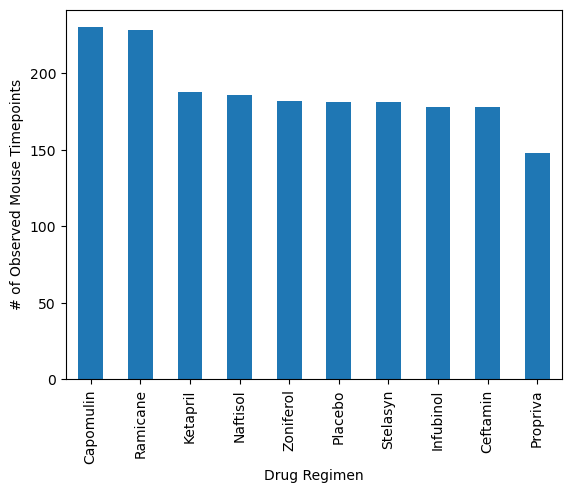

In [10]:
# Bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_groups = clean_df['Drug Regimen'].value_counts()

ax = drug_groups.plot(x='Mouse ID',    # x-axis
             y=['Drug Regimen'],        # y-axis
             kind='bar',
             xlabel="Drug Regimen",     # x-axis label
             ylabel='# of Observed Mouse Timepoints')

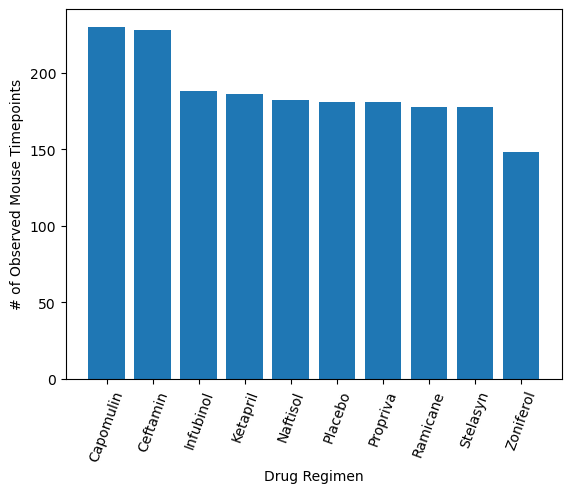

In [11]:
# Bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

columns = np.arange(len(drug_groups))
plt.bar(columns, drug_groups, align="center")
tick_locations = [value for value in columns]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# formatting
plt.tick_params(axis='x', rotation=70)

# display graph
plt.show()

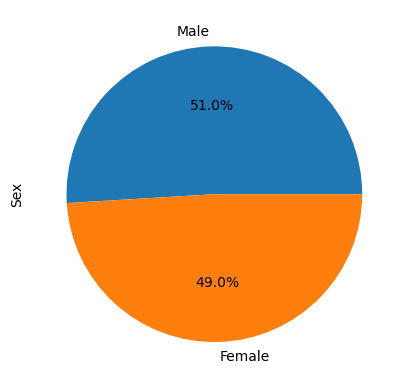

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_df['Sex'].value_counts()
gender.plot.pie( autopct="%1.1f%%")
plt.ylabel('Sex')

# show pie chart
plt.show()

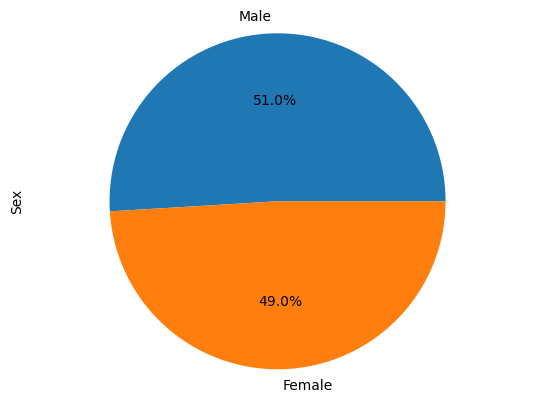

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender2 = clean_df['Sex'].value_counts()
gender2.plot(kind='pie', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.axis("equal")

# show pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin", :]
ramicane = merged_df.loc[merged_df["Drug Regimen"] == "Ramicane", :]
infubinol = merged_df.loc[merged_df["Drug Regimen"] == "Infubinol", :]
ceftamin = merged_df.loc[merged_df["Drug Regimen"] == "Ceftamin", :]

In [15]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
    # capomulin
capomulin_tp = capomulin.groupby("Mouse ID").max()["Timepoint"]
capomulin_vol = pd.DataFrame(capomulin_tp)
capomulin_merge = pd.merge(capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")

    # ramicane
ramicane_tp = ramicane.groupby("Mouse ID").max()["Timepoint"]
ramicane_vol = pd.DataFrame(ramicane_tp)
ramicane_merge = pd.merge(ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")

    # infubinol
infubinol_tp = infubinol.groupby("Mouse ID").max()["Timepoint"]
infubinol_vol = pd.DataFrame(infubinol_tp)
infubinol_merge = pd.merge(infubinol_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")

    # ceftamin
ceftamin_tp = ceftamin.groupby("Mouse ID").max()["Timepoint"]
ceftamin_vol = pd.DataFrame(ceftamin_tp)
ceftamin_merge = pd.merge(ceftamin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
capomulin_data = capomulin_merge["Tumor Volume (mm3)"]
ramicane_data = ramicane_merge["Tumor Volume (mm3)"]
infubinol_data = infubinol_merge["Tumor Volume (mm3)"]
ceftamin_data = ceftamin_merge["Tumor Volume (mm3)"]

In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Determine outliers using upper and lower bounds
print(f"--------------------")

#Capomulin data
caquartiles = capomulin_data.quantile([.25,.5,.75])
cafirst = caquartiles[0.25]
casecond = caquartiles[0.75]
caiqr = casecond-cafirst

print(f"Capomulin tumor Median: {caquartiles[0.5]} ")
print(f"Capomulin tumor Lower Bound: {cafirst}")
print(f"Capomulin tumor Upper Bound: {casecond}")
print(f"Capomulin tumor IQR: {caiqr}")

calower = cafirst - (1.5*caiqr)
caupper = casecond + (1.5*caiqr)

print(f"Potential outliers are below {calower} and above {caupper}.")
print(f"--------------------")

    #Ramicane data
raquartiles = ramicane_data.quantile([.25,.5,.75])
rafirst = raquartiles[0.25]
rasecond = raquartiles[0.75]
raiqr = rasecond-rafirst

print(f"Ramicane tumor Median: {raquartiles[0.5]} ")
print(f"Ramicane tumor Lower Bound: {rafirst}")
print(f"Ramicane tumor Upper Bound: {rasecond}")
print(f"Ramicane tumor IQR: {raiqr}")

ralower = rafirst - (1.5*raiqr)
raupper = rasecond + (1.5*raiqr)

print(f"Potential outliers are below {ralower} and above {raupper}.")
print(f"--------------------")

    #Infubinol data
iquartiles = infubinol_data.quantile([.25,.5,.75])
ifirst = iquartiles[0.25]
isecond = iquartiles[0.75]
iiqr = isecond-ifirst

print(f"Infubinol tumor Median: {iquartiles[0.5]} ")
print(f"Infubinol tumor Lower Bound: {ifirst}")
print(f"Infubinol tumor Upper Bound: {isecond}")
print(f"Infubinol tumor IQR: {iiqr}")

ilower = ifirst - (1.5*iiqr)
iupper = isecond + (1.5*iiqr)

print(f"Potential outliers are below {ilower} and above {iupper}.")
print(f"--------------------")

    #Ceftamin data
cquartiles = ceftamin_data.quantile([.25,.5,.75])
cfirst = cquartiles[0.25]
csecond = cquartiles[0.75]
ciqr = csecond-cfirst

print(f"Ceftamin tumor Median: {cquartiles[0.5]} ")
print(f"Ceftamin tumor Lower Bound: {cfirst}")
print(f"Ceftamin tumor Upper Bound: {csecond}")
print(f"Ceftamin tumor IQR: {ciqr}")

clower = cfirst - (1.5*ciqr)
cupper = csecond + (1.5*ciqr)

print(f"Potential outliers are below {clower} and above {cupper}.")
print(f"--------------------")

--------------------
Capomulin tumor Median: 38.1251644 
Capomulin tumor Lower Bound: 32.37735684
Capomulin tumor Upper Bound: 40.1592203
Capomulin tumor IQR: 7.781863460000004
Potential outliers are below 20.70456164999999 and above 51.83201549.
--------------------
Ramicane tumor Median: 36.56165229 
Ramicane tumor Lower Bound: 31.56046955
Ramicane tumor Upper Bound: 40.65900627
Ramicane tumor IQR: 9.098536719999998
Potential outliers are below 17.912664470000003 and above 54.30681135.
--------------------
Infubinol tumor Median: 60.16518046 
Infubinol tumor Lower Bound: 54.04860769
Infubinol tumor Upper Bound: 65.52574285
Infubinol tumor IQR: 11.477135160000003
Potential outliers are below 36.83290494999999 and above 82.74144559000001.
--------------------
Ceftamin tumor Median: 59.85195552 
Ceftamin tumor Lower Bound: 48.72207785
Ceftamin tumor Upper Bound: 64.29983003
Ceftamin tumor IQR: 15.577752179999997
Potential outliers are below 25.355449580000002 and above 87.66645829999999

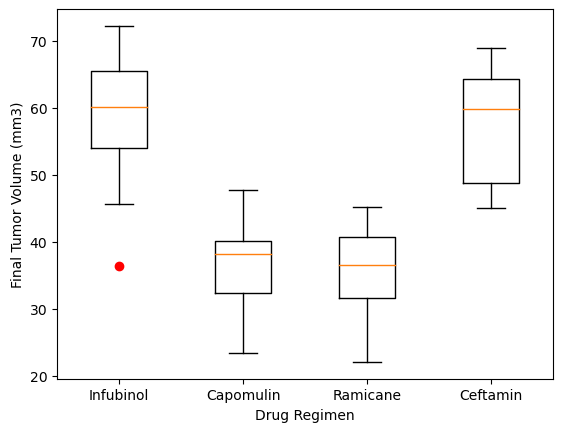

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
trtmt_tumorvol =[infubinol_data, capomulin_data, ramicane_data, ceftamin_data]
trtmt = ["Infubinol", "Capomulin", "Ramicane", "Ceftamin"]

fig1, ax1 = plt.subplots()

ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(trtmt_tumorvol, labels=trtmt, vert=True, sym="red")
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

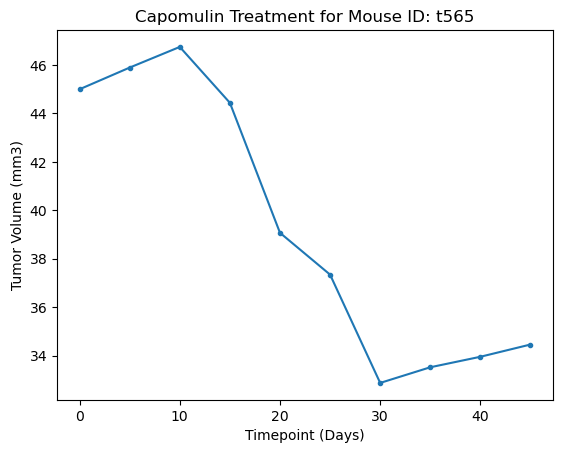

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_tp = capomulin.groupby("Mouse ID").max()["Timepoint"] #find max values
capomulin_vol = pd.DataFrame(capomulin_tp) #store as df
capomulin_merge = pd.merge(capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")

capomulin_sp = clean_df.loc[clean_df["Mouse ID"] == "t565", :]
x_axis = capomulin_sp["Timepoint"]
y_axis = capomulin_sp["Tumor Volume (mm3)"]

#plotting line grapgh
fig1, ax1 = plt.subplots()
plt.plot(x_axis, y_axis, marker='.')
    #labels
plt.title("Capomulin Treatment for Mouse ID: t565")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

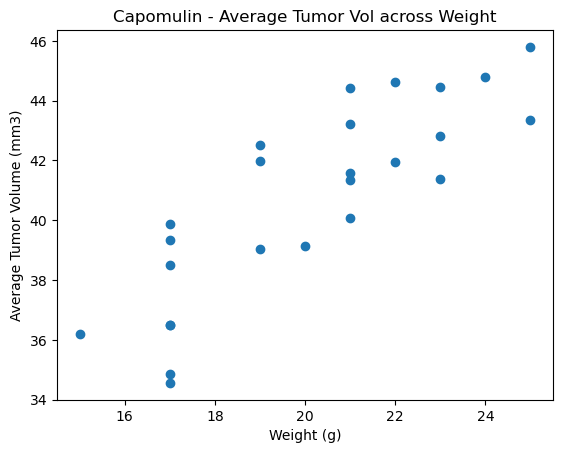

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = clean_df[clean_df["Drug Regimen"]== "Capomulin"]

# groupby MouseID then get mean of Weight and Tumor Vol
x_avg_weight = capomulin.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()
x_weight = x_avg_weight["Weight (g)"]
y_volume = x_avg_weight["Tumor Volume (mm3)"]

#scatter plot
plt.scatter(x_weight, y_volume)

plt.title("Capomulin - Average Tumor Vol across Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#display
plt.show()

## Correlation and Regression

--------------------
The correlation between mouse weight and the average tumor volume is 0.84
--------------------


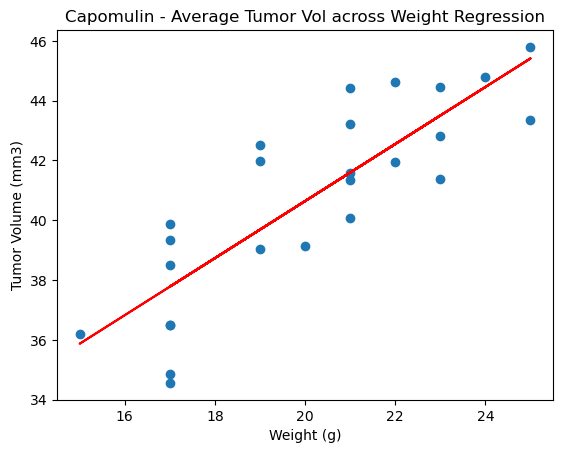

In [21]:
# Correlation coefficient
cor = st.pearsonr(x_avg_weight['Weight (g)'],x_avg_weight['Tumor Volume (mm3)'])
print(f"--------------------")
print(f"The correlation between mouse weight and the average tumor volume is {round(cor[0],2)}")
print(f"--------------------")

# Linear regression line 
(slope, intercept, r_value, p_value, std) = linregress(x_avg_weight["Weight (g)"], x_avg_weight["Tumor Volume (mm3)"])
r_value = x_avg_weight["Weight (g)"]* slope + intercept
lineeq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

#Scatterplot
plt.scatter(x_avg_weight["Weight (g)"],x_avg_weight["Tumor Volume (mm3)"])
plt.plot(x_avg_weight["Weight (g)"], r_value, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin - Average Tumor Vol across Weight Regression")

# Display graph
plt.show()